In [153]:
# Dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy import stats
from scipy.stats import linregress
from scipy.stats import normaltest

In [106]:
Unemployment_data = Path("Resources/NEw Filtered UNEMPR.csv")
Unemployment_data = pd.read_csv(Unemployment_data)
Unemployment_data

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,MEASURE,Measure,UNIT_MEASURE,Unit of measure,...,TIME_PERIOD,Time period,OBS_VALUE,Observation value,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals
0,DATAFLOW,OECD.ELS.SAE:DSD_LFS@DF_LFS_INDIC(1.1),Labour force statistics indicators,I,USA,United States,UNE_RATE,Unemployment rate,PT_LF_SUB,Percentage of labour force in the same subgroup,...,1960,NaN,5.384126,NaN,A,Normal value,NaN,NaN,1,One
1,DATAFLOW,OECD.ELS.SAE:DSD_LFS@DF_LFS_INDIC(1.1),Labour force statistics indicators,I,USA,United States,UNE_RATE,Unemployment rate,PT_LF_SUB,Percentage of labour force in the same subgroup,...,1961,NaN,6.506720,NaN,A,Normal value,NaN,NaN,1,One
2,DATAFLOW,OECD.ELS.SAE:DSD_LFS@DF_LFS_INDIC(1.1),Labour force statistics indicators,I,USA,United States,UNE_RATE,Unemployment rate,PT_LF_SUB,Percentage of labour force in the same subgroup,...,1962,NaN,5.361554,NaN,A,Normal value,NaN,NaN,1,One
3,DATAFLOW,OECD.ELS.SAE:DSD_LFS@DF_LFS_INDIC(1.1),Labour force statistics indicators,I,USA,United States,UNE_RATE,Unemployment rate,PT_LF_SUB,Percentage of labour force in the same subgroup,...,1963,NaN,5.456398,NaN,A,Normal value,NaN,NaN,1,One
4,DATAFLOW,OECD.ELS.SAE:DSD_LFS@DF_LFS_INDIC(1.1),Labour force statistics indicators,I,USA,United States,UNE_RATE,Unemployment rate,PT_LF_SUB,Percentage of labour force in the same subgroup,...,1964,NaN,4.995648,NaN,A,Normal value,NaN,NaN,1,One
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,DATAFLOW,OECD.ELS.SAE:DSD_LFS@DF_LFS_INDIC(1.1),Labour force statistics indicators,I,USA,United States,UNE_RATE,Unemployment rate,PT_LF_SUB,Percentage of labour force in the same subgroup,...,2018,NaN,3.895703,NaN,A,Normal value,NaN,NaN,1,One
59,DATAFLOW,OECD.ELS.SAE:DSD_LFS@DF_LFS_INDIC(1.1),Labour force statistics indicators,I,USA,United States,UNE_RATE,Unemployment rate,PT_LF_SUB,Percentage of labour force in the same subgroup,...,2019,NaN,3.668283,NaN,A,Normal value,NaN,NaN,1,One
60,DATAFLOW,OECD.ELS.SAE:DSD_LFS@DF_LFS_INDIC(1.1),Labour force statistics indicators,I,USA,United States,UNE_RATE,Unemployment rate,PT_LF_SUB,Percentage of labour force in the same subgroup,...,2020,NaN,8.054572,NaN,A,Normal value,NaN,NaN,1,One
61,DATAFLOW,OECD.ELS.SAE:DSD_LFS@DF_LFS_INDIC(1.1),Labour force statistics indicators,I,USA,United States,UNE_RATE,Unemployment rate,PT_LF_SUB,Percentage of labour force in the same subgroup,...,2021,NaN,5.349189,NaN,A,Normal value,NaN,NaN,1,One


In [107]:
Unemployment_data.columns

Index(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA',
       'Reference area', 'MEASURE', 'Measure', 'UNIT_MEASURE',
       'Unit of measure', 'SEX', 'Sex', 'AGE', 'Age', 'LABOUR_FORCE_STATUS',
       'Labour force status', 'TIME_PERIOD', 'Time period', 'OBS_VALUE',
       'Observation value', 'OBS_STATUS', 'Observation status', 'UNIT_MULT',
       'Unit multiplier', 'DECIMALS', 'Decimals'],
      dtype='object')

In [108]:
Unemployment_data.dtypes

STRUCTURE               object
STRUCTURE_ID            object
STRUCTURE_NAME          object
ACTION                  object
REF_AREA                object
Reference area          object
MEASURE                 object
Measure                 object
UNIT_MEASURE            object
Unit of measure         object
SEX                     object
Sex                     object
AGE                     object
Age                     object
LABOUR_FORCE_STATUS     object
Labour force status     object
TIME_PERIOD              int64
Time period            float64
OBS_VALUE              float64
Observation value      float64
OBS_STATUS              object
Observation status      object
UNIT_MULT              float64
Unit multiplier        float64
DECIMALS                 int64
Decimals                object
dtype: object

In [109]:
# List of columns to drop
columns_to_drop = ['STRUCTURE', 'STRUCTURE_ID', 
                   'STRUCTURE_NAME', 'ACTION', 
                   'REF_AREA', 'MEASURE', 
                   'UNIT_MEASURE', 'Time period', 
                   'Observation value', 'UNIT_MULT',
                   'Unit multiplier', 'Decimals']

# Drop the columns
Unemployment_data = Unemployment_data.drop(columns=columns_to_drop)

# Save the updated DataFrame to a new CSV file
Unemployment_data.to_csv('updated_UMPR.csv', index=False)

In [110]:
# List of columns to drop
columns_to_drop = ['SEX', 'AGE', 'LABOUR_FORCE_STATUS', 'OBS_STATUS']

# Drop the columns
Unemployment_data = Unemployment_data.drop(columns=columns_to_drop)

# Save the updated DataFrame to a new CSV file
Unemployment_data.to_csv('updated_UMPR.csv', index=False)

In [111]:
Unemployment_data

,Reference area,Measure,Unit of measure,Sex,Age,Labour force status,TIME_PERIOD,OBS_VALUE,Observation status,DECIMALS
0,United States,Unemployment rate,Percentage of labour force in the same subgroup,Total,Total,Unemployment,1960,5.384126,Normal value,1
1,United States,Unemployment rate,Percentage of labour force in the same subgroup,Total,Total,Unemployment,1961,6.506720,Normal value,1
2,United States,Unemployment rate,Percentage of labour force in the same subgroup,Total,Total,Unemployment,1962,5.361554,Normal value,1
3,United States,Unemployment rate,Percentage of labour force in the same subgroup,Total,Total,Unemployment,1963,5.456398,Normal value,1
4,United States,Unemployment rate,Percentage of labour force in the same subgroup,Total,Total,Unemployment,1964,4.995648,Normal value,1
...,...,...,...,...,...,...,...,...,...,...
58,United States,Unemployment rate,Percentage of labour force in the same subgroup,Total,Total,Unemployment,2018,3.895703,Normal value,1
59,United States,Unemployment rate,Percentage of labour force in the same subgroup,Total,Total,Unemployment,2019,3.668283,Normal value,1
60,United States,Unemployment rate,Percentage of labour force in the same subgroup,Total,Total,Unemployment,2020,8.054572,Normal value,1
61,United States,Unemployment rate,Percentage of labour force in the same subgroup,Total,Total,Unemployment,2021,5.349189,Normal value,1


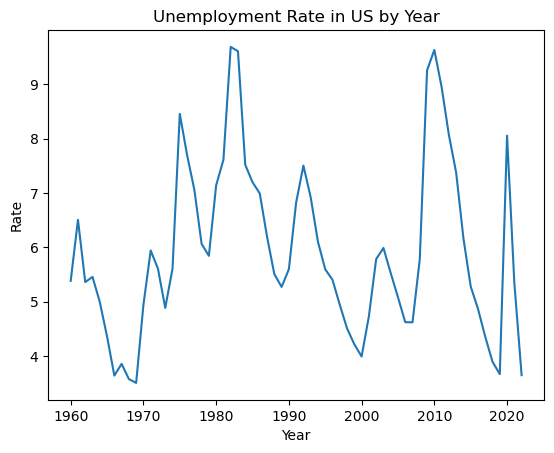

In [112]:
# 'TIME' and 'Value' are The Year and Unemployment rate values
plt.plot(Unemployment_data['TIME_PERIOD'], Unemployment_data['OBS_VALUE'])

plt.title('Unemployment Rate in US by Year')
plt.xlabel('Year')
plt.ylabel('Rate')

plt.show()

In [113]:
# Dictionary of old column names and new column names
column_names = {'TIME_PERIOD': 'TIME'}

# Rename the columns
Unemployment_data = Unemployment_data.rename(columns=column_names)

# Save the updated DataFrame to a new CSV file
Unemployment_data.to_csv('updated_UMPR.csv', index=False)

In [114]:
Suicide_Rates = Path("Resources/Suicide Rates.csv")
Suicide_Rates = pd.read_csv(Suicide_Rates)
Suicide_Rates.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,SUICIDE,TOT,100000PER,A,1960,13.6,NaN
1,AUS,SUICIDE,TOT,100000PER,A,1961,15.0,NaN
2,AUS,SUICIDE,TOT,100000PER,A,1962,17.4,NaN
3,AUS,SUICIDE,TOT,100000PER,A,1963,19.8,NaN
4,AUS,SUICIDE,TOT,100000PER,A,1964,18.4,NaN


In [115]:
# Filter the DataFrame
Suicide_Rates = Suicide_Rates[Suicide_Rates['LOCATION'] == 'USA']

Suicide_Rates = Suicide_Rates[Suicide_Rates['SUBJECT'] == 'TOT']

# Save the filtered DataFrame to a new CSV file
Suicide_Rates.to_csv('filtered_Suicide_Rates.csv', index=False)

In [116]:
Suicide_Rates

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
1537,USA,SUICIDE,TOT,100000PER,A,1960,13.9,NaN
1538,USA,SUICIDE,TOT,100000PER,A,1961,13.6,NaN
1539,USA,SUICIDE,TOT,100000PER,A,1962,14.2,NaN
1540,USA,SUICIDE,TOT,100000PER,A,1963,14.3,NaN
1541,USA,SUICIDE,TOT,100000PER,A,1964,14.0,NaN
...,...,...,...,...,...,...,...,...
1593,USA,SUICIDE,TOT,100000PER,A,2016,14.2,NaN
1594,USA,SUICIDE,TOT,100000PER,A,2017,14.8,NaN
1595,USA,SUICIDE,TOT,100000PER,A,2018,15.0,NaN
1596,USA,SUICIDE,TOT,100000PER,A,2019,14.7,NaN


In [117]:
Suicide_Rates.dtypes

LOCATION       object
INDICATOR      object
SUBJECT        object
MEASURE        object
FREQUENCY      object
TIME            int64
Value         float64
Flag Codes     object
dtype: object

In [118]:
Suicide_Rates.columns

Index(['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'TIME',
       'Value', 'Flag Codes'],
      dtype='object')

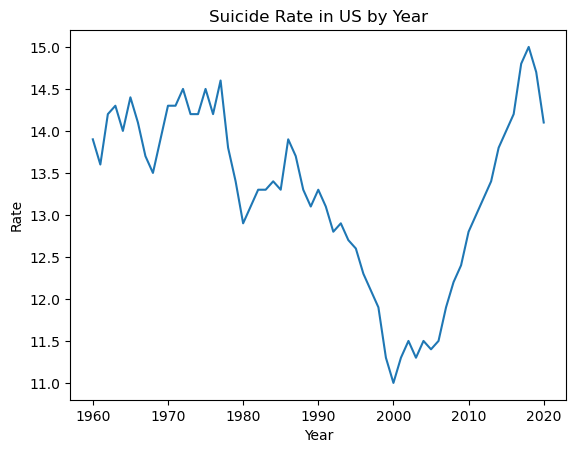

In [119]:
plt.plot(Suicide_Rates['TIME'], Suicide_Rates['Value'])

plt.title('Suicide Rate in US by Year')
plt.xlabel('Year')
plt.ylabel('Rate')

plt.show()

In [120]:
# Merge the DataFrames on the year column
merged_df = pd.merge(Unemployment_data, Suicide_Rates, on='TIME')

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_UNEMPR_SR.csv', index=False)

In [140]:
UnEmp_SR = Path("merged_UNEMPR_SR.csv")
UnEmp_SR = pd.read_csv(UnEmp_SR)
UnEmp_SR.head()

,Reference area,Measure,Unit of measure,Labour force status,Year,Unemployment Rate,LOCATION,INDICATOR,MEASURE,Suicide Rate
0,United States,Unemployment rate,Percentage of labour force in the same subgroup,Unemployment,1960,5.384126,USA,SUICIDE,100000PER,13.9
1,United States,Unemployment rate,Percentage of labour force in the same subgroup,Unemployment,1961,6.506720,USA,SUICIDE,100000PER,13.6
2,United States,Unemployment rate,Percentage of labour force in the same subgroup,Unemployment,1962,5.361554,USA,SUICIDE,100000PER,14.2
3,United States,Unemployment rate,Percentage of labour force in the same subgroup,Unemployment,1963,5.456398,USA,SUICIDE,100000PER,14.3
4,United States,Unemployment rate,Percentage of labour force in the same subgroup,Unemployment,1964,4.995648,USA,SUICIDE,100000PER,14.0


In [141]:
# List of columns to drop
columns_to_drop = ['Flag Codes', 'DECIMALS', 'Sex', 'Age', 'Observation status', 'SUBJECT', 'FREQUENCY']

# Drop the columns
UnEmp_SR = UnEmp_SR.drop(columns=columns_to_drop)

# Save the updated DataFrame to a new CSV file
UnEmp_SR.to_csv('merged_UNEMPR_SR.csv', index=False)

KeyError: "['Flag Codes', 'DECIMALS', 'Sex', 'Age', 'Observation status', 'SUBJECT', 'FREQUENCY'] not found in axis"

In [143]:
UnEmp_SR.head()

,Reference area,Measure,Unit of measure,Labour force status,Year,Unemployment Rate,LOCATION,INDICATOR,MEASURE,Suicide Rate
0,United States,Unemployment rate,Percentage of labour force in the same subgroup,Unemployment,1960,5.384126,USA,SUICIDE,100000PER,13.9
1,United States,Unemployment rate,Percentage of labour force in the same subgroup,Unemployment,1961,6.506720,USA,SUICIDE,100000PER,13.6
2,United States,Unemployment rate,Percentage of labour force in the same subgroup,Unemployment,1962,5.361554,USA,SUICIDE,100000PER,14.2
3,United States,Unemployment rate,Percentage of labour force in the same subgroup,Unemployment,1963,5.456398,USA,SUICIDE,100000PER,14.3
4,United States,Unemployment rate,Percentage of labour force in the same subgroup,Unemployment,1964,4.995648,USA,SUICIDE,100000PER,14.0


In [124]:
# Dictionary of old column names and new column names
column_names = {'OBS_VALUE': 'Unemployment Rate', 'Value': 'Suicide Rate'}

# Rename the columns
UnEmp_SR = UnEmp_SR.rename(columns=column_names)

# Save the updated DataFrame to a new CSV file
UnEmp_SR.to_csv('merged_UNEMPR_SR.csv', index=False)

In [139]:
UnEmp_SR.head()

,Reference area,Measure,Unit of measure,Labour force status,Year,Unemployment Rate,LOCATION,INDICATOR,MEASURE,Suicide Rate
55,United States,Unemployment rate,Percentage of labour force in the same subgroup,Unemployment,2015,5.280944,USA,SUICIDE,100000PER,14.0
56,United States,Unemployment rate,Percentage of labour force in the same subgroup,Unemployment,2016,4.870250,USA,SUICIDE,100000PER,14.2
57,United States,Unemployment rate,Percentage of labour force in the same subgroup,Unemployment,2017,4.356233,USA,SUICIDE,100000PER,14.8
58,United States,Unemployment rate,Percentage of labour force in the same subgroup,Unemployment,2018,3.895703,USA,SUICIDE,100000PER,15.0
59,United States,Unemployment rate,Percentage of labour force in the same subgroup,Unemployment,2019,3.668283,USA,SUICIDE,100000PER,14.7


Pearson correlation coefficient: 0.009638250375919932


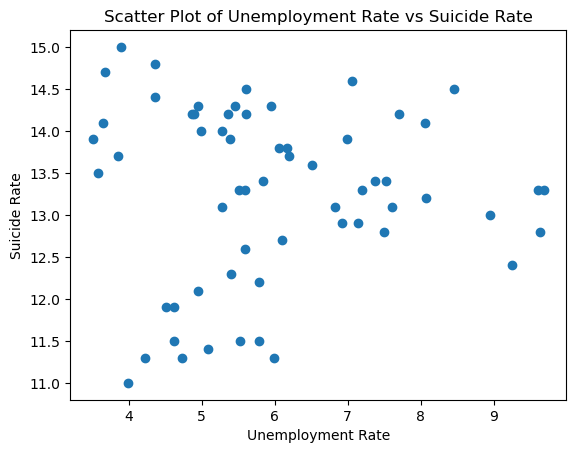

In [144]:
plt.scatter(UnEmp_SR['Unemployment Rate'], UnEmp_SR['Suicide Rate'])

plt.title('Scatter Plot of Unemployment Rate vs Suicide Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Suicide Rate')

# Assuming 'column1' and 'column2' are columns in your DataFrame
correlation = UnEmp_SR['Unemployment Rate'].corr(UnEmp_SR['Suicide Rate'])

print("Pearson correlation coefficient:", correlation)

plt.show()

In [145]:
# Dictionary of old column names and new column names
column_names = {'TIME': 'Year'}

# Rename the columns
UnEmp_SR = UnEmp_SR.rename(columns=column_names)

# Save the updated DataFrame to a new CSV file
UnEmp_SR.to_csv('merged_UNEMPR_SR.csv', index=False)

In [ ]:
UnEmp_SR = UnEmp_SR[(UnEmp_SR['Year'] >= 2015) & (UnEmp_SR['Year'] <= 2020)] 

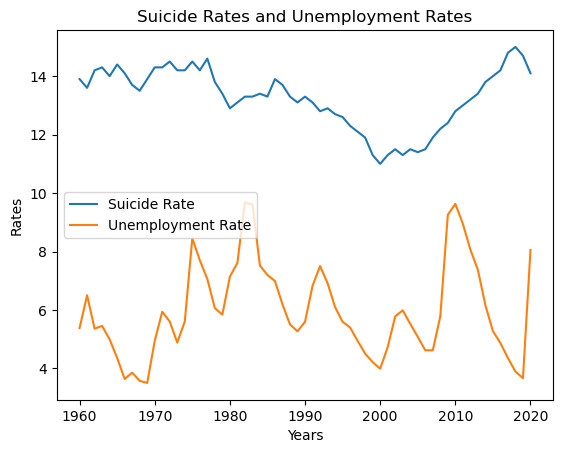

In [149]:
plt.plot(UnEmp_SR['Year'], UnEmp_SR['Suicide Rate'], label='Suicide Rate') 
plt.plot(UnEmp_SR['Year'], UnEmp_SR['Unemployment Rate'], label='Unemployment Rate') 

plt.xlabel('Years')
plt.ylabel('Rates')
plt.title('Suicide Rates and Unemployment Rates')

plt.legend()
plt.show()

The r-squared is: 9.289587030892067e-05


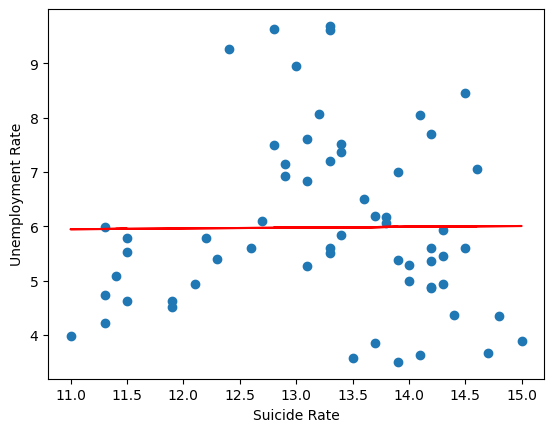

In [147]:
x_values = UnEmp_SR['Suicide Rate']
y_values = UnEmp_SR['Unemployment Rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Suicide Rate')
plt.ylabel('Unemployment Rate')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [148]:
data = UnEmp_SR['Suicide Rate']  

# Step 4: Use the normaltest function to check for normality
k2, p = normaltest(data)

# Step 5: Print the result
print("p = {:g}".format(p))

alpha = 0.05
if p < alpha:  # null hypothesis: data comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0.0869685
The null hypothesis cannot be rejected


In [150]:
Q1 = UnEmp_SR['Suicide Rate'].quantile(0.25)
Q3 = UnEmp_SR['Suicide Rate'].quantile(0.75)
IQR = Q3 - Q1

filter = (UnEmp_SR['Suicide Rate'] >= Q1 - 1.5 * IQR) & (UnEmp_SR['Suicide Rate'] <= Q3 + 1.5 *IQR)
UnEmp_SR_no_outlier = UnEmp_SR.loc[filter]  

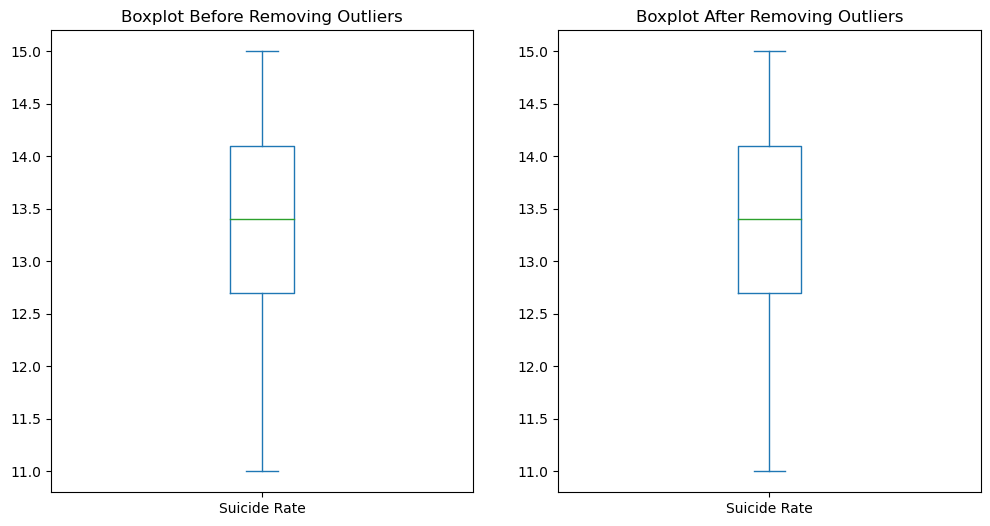

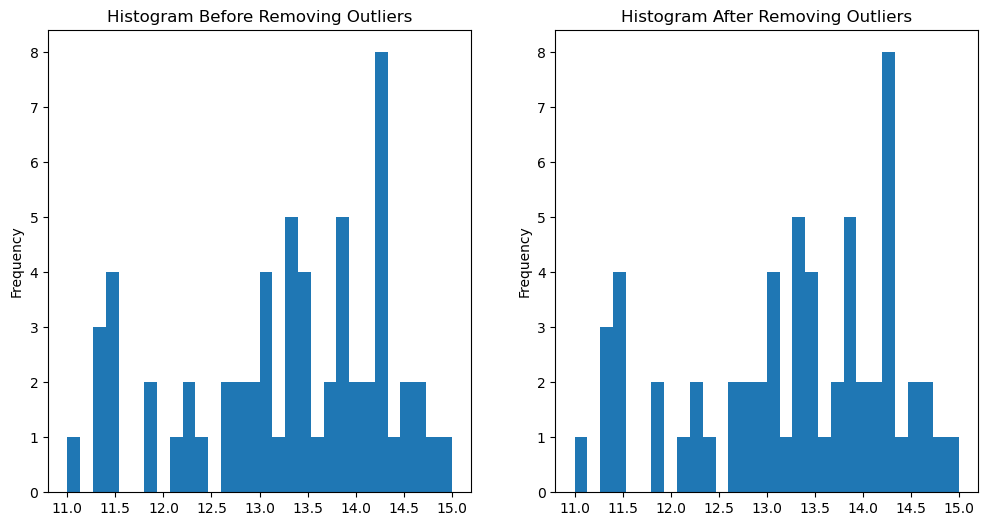

In [151]:
# Boxplot before removing outliers
plt.figure(figsize=(12, 6))
plt.subplot(121)
UnEmp_SR['Suicide Rate'].plot(kind='box')
plt.title('Boxplot Before Removing Outliers')

# Boxplot after removing outliers
plt.subplot(122)
UnEmp_SR_no_outlier['Suicide Rate'].plot(kind='box')
plt.title('Boxplot After Removing Outliers')

plt.show()

# Histogram before removing outliers
plt.figure(figsize=(12, 6))
plt.subplot(121)
UnEmp_SR['Suicide Rate'].plot(kind='hist', bins=30)
plt.title('Histogram Before Removing Outliers')

# Histogram after removing outliers
plt.subplot(122)
UnEmp_SR_no_outlier['Suicide Rate'].plot(kind='hist', bins=30)
plt.title('Histogram After Removing Outliers')

plt.show()

In [152]:
data = UnEmp_SR['Unemployment Rate']  

# Step 4: Use the normaltest function to check for normality
k2, p = normaltest(data)

# Step 5: Print the result
print("p = {:g}".format(p))

alpha = 0.05
if p < alpha:  # null hypothesis: data comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0.117035
The null hypothesis cannot be rejected


In [154]:
# Create a contingency table
contingency_table = pd.crosstab(UnEmp_SR['Unemployment Rate'], UnEmp_SR['Suicide Rate'])

# Perform the Chi-Squared test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

Chi2 value: 1952.0
P-value: 0.3000348897198931
Degrees of freedom: 1920
